In [39]:
from typing import Union
import os
import random
from matplotlib import pyplot as plt
from einops import rearrange
import PIL
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import Grayscale
from torchvision.transforms.functional import to_pil_image
import torch
from src.dataset.vitonhd import VITONHDDataset
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

In [40]:
data_path = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd')
dataset = VITONHDDataset(data_path)

In [41]:
dataset_len = len(dataset)
rand_idx = random.randint(0, dataset_len - 1)
rand_sample = dataset[rand_idx]

In [42]:
rand_sample.keys()

dict_keys(['original_image', 'image', 'masked_image', 'mask', 'densepose', 'cloth_raw', 'cloth'])

In [43]:
def show(img: Union[torch.Tensor, PIL.Image.Image], print_shape: bool = False):
    if isinstance(img, PIL.Image.Image):
        img = pil_to_tensor(img)

    if img.ndim == 3:
        img = rearrange(img, 'c h w -> h w c')
    else:
        raise ValueError('Only support for RGB image for now.')

    if print_shape:
        print(img.shape)

    plt.imshow(img)

torch.Size([1024, 768, 3])


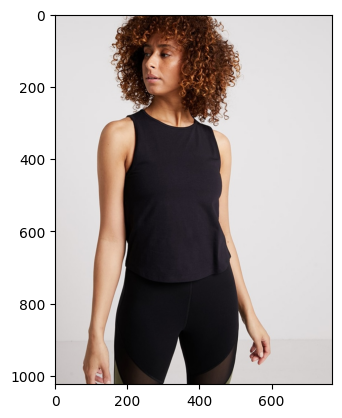

In [44]:
show(rand_sample['original_image'], print_shape=True)

torch.Size([1024, 768, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


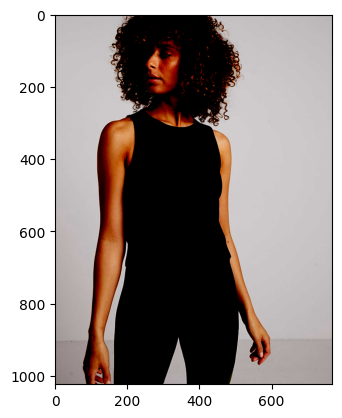

In [45]:
show(rand_sample['image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


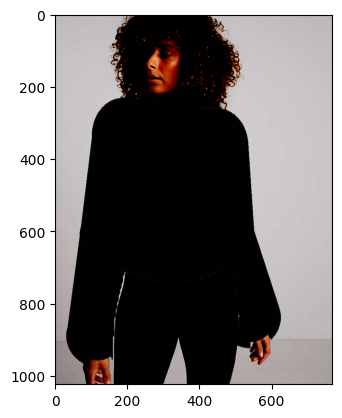

In [46]:
show(rand_sample['masked_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


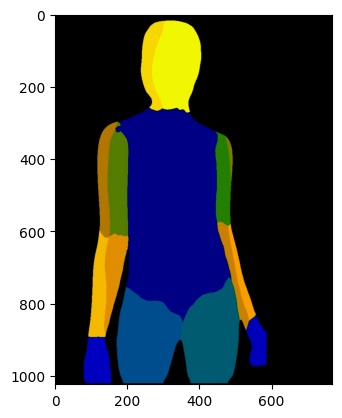

In [47]:
show(rand_sample['densepose'], print_shape=True)

torch.Size([1024, 768, 1])


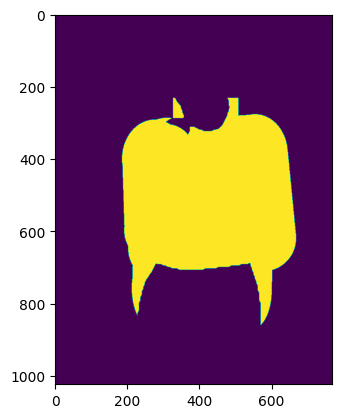

In [48]:
# This image is actually binary image but
# we converted it from PIL Image to Pytorch Tensor
# so the color space is not white-black one
show(rand_sample['mask'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


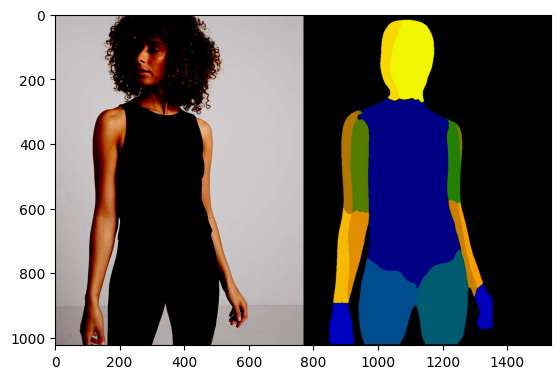

In [49]:
show(torch.cat([rand_sample['image'], rand_sample['densepose']], dim=-1))

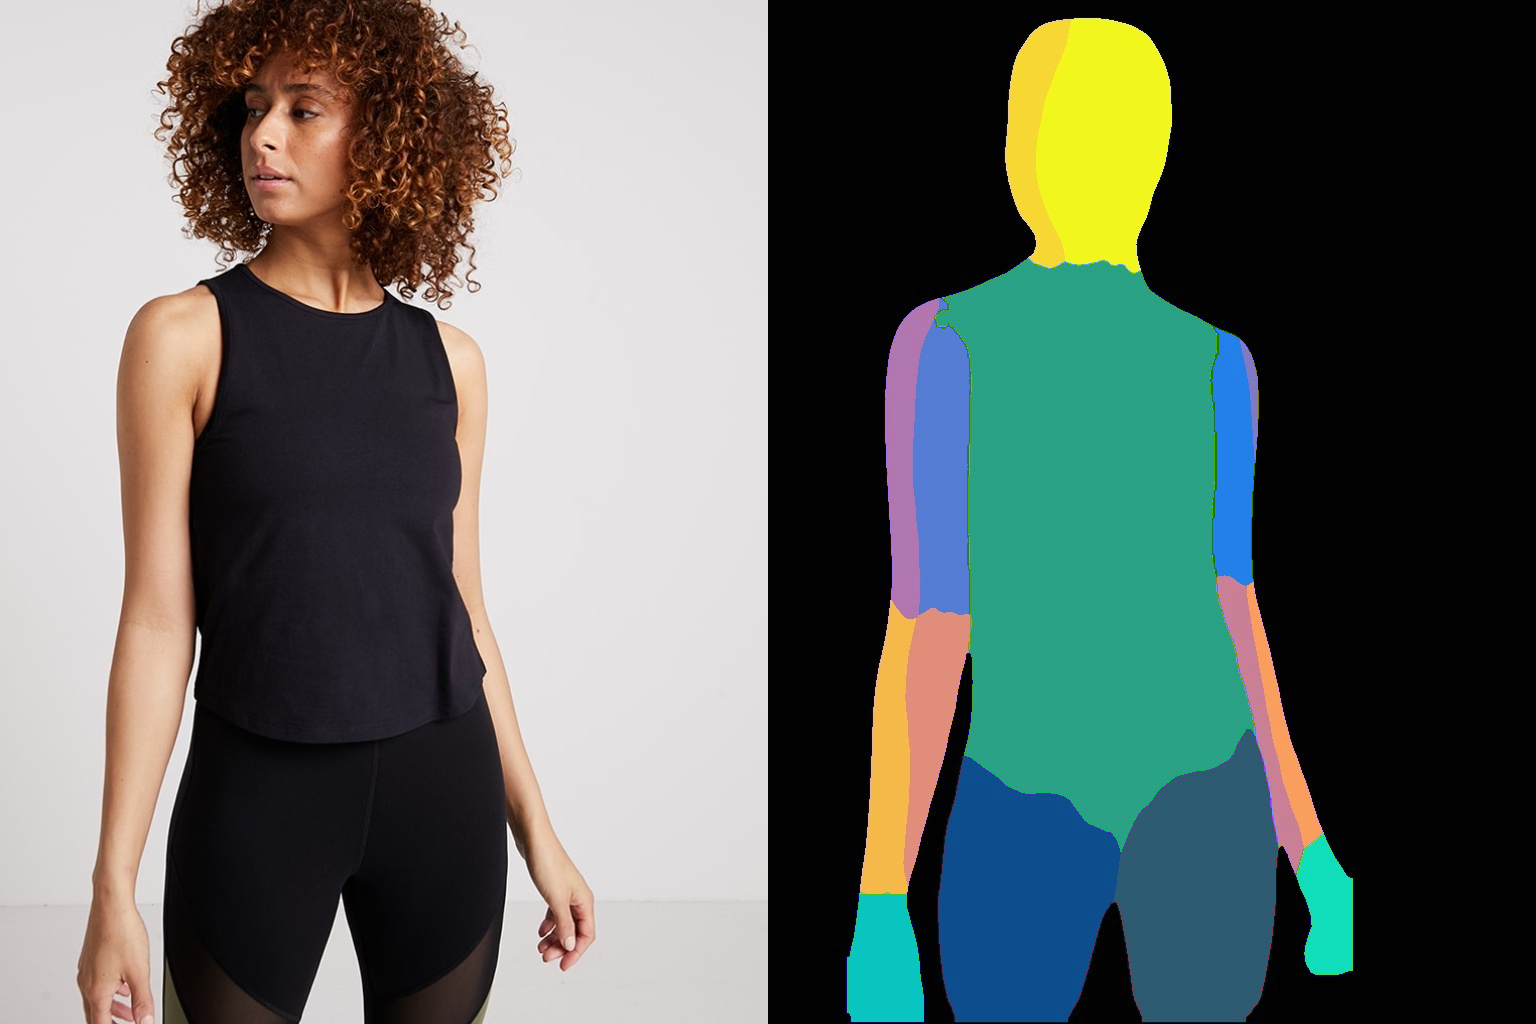

In [50]:
origin_img = to_pil_image(rand_sample['original_image'])
dense_img = to_pil_image(rand_sample['densepose'])
new_img = PIL.Image.new('RGB', (origin_img.width * 2, origin_img.height))
new_img.paste(origin_img, (0, 0))
new_img.paste(dense_img, (origin_img.width, 00))
new_img

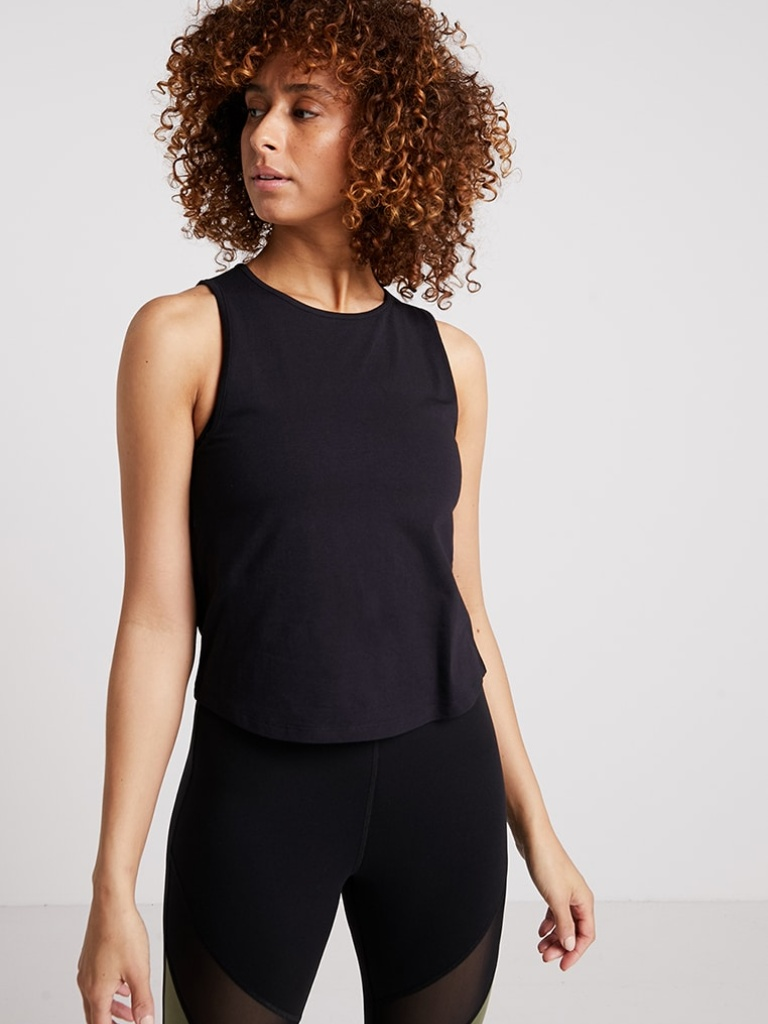

In [55]:
new_img.crop((0, 0, new_img.width // 2, new_img.height))